# E-commerce Sales Analysis

In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [ ]:
# Install "skimpy" package: This package allows you to clean column names  
!pip install skimpy
from skimpy import clean_columns

In [3]:
path = "/content/drive/MyDrive/DATA/orders_export_1.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (45,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(2)

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#25494,charleskimharris@gmail.com,paid,2022-08-21 08:37:44 +0700,unfulfilled,NaN,no,USD,23.95,4.95,0.0,28.9,NaN,0.0,Standard Shipping 1,2022-08-21 08:37:43 +0700,1,Custom In Loving Memory Sticker : In Loving Me...,23.95,31.95,NaN,True,True,pending,Kim Harris,1574 Lapperell Rd,1574 Lapperell Rd,NaN,NaN,Peebles,'45660,OH,US,9372175013,Kim Harris,1574 Lapperell Rd,1574 Lapperell Rd,NaN,NaN,Peebles,'45660,OH,US,9372175013,NaN,NaN,NaN,Stripe,c28232509784242.1,0.0,Support-Awarenesss-Stickers,4.658310e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ohio,Ohio,c28232509784242.1,NaN,NaN,c28232509784242.1
1,#25493,lkoepsellcrook@gmsil.com,paid,2022-08-21 07:05:49 +0700,unfulfilled,NaN,no,USD,16.95,4.95,0.0,21.9,NaN,0.0,Standard Shipping 1,2022-08-21 07:05:48 +0700,1,Breast Cancer Car Decal: I Suffer from breast ...,16.95,24.95,NaN,True,True,pending,Koepsell crook,1259 School Drive,1259 School Drive,NaN,NaN,Waukesha,'53189,WI,US,NaN,Koepsell crook,1259 School Drive,1259 School Drive,NaN,NaN,Waukesha,'53189,WI,US,NaN,NaN,NaN,NaN,PayPal Express Checkout,rlpa75KMynhTZQ5KEy9y35vSL,0.0,Decal,4.658258e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wisconsin,Wisconsin,rlpa75KMynhTZQ5KEy9y35vSL,NaN,NaN,rlpa75KMynhTZQ5KEy9y35vSL


In [5]:
df.columns

Index(['Name', 'Email', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Name', 'Billing Street',
       'Billing Address1', 'Billing Address2', 'Billing Company',
       'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Phone', 'Shipping Name', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Shipping Phone', 'Notes', 'Note Attributes',
       'Cancelled at', 'Payment Method', 'Payment Reference',
       'Refunded Amount', 'Vendor', '

Get useful data to analyze

In [6]:
df_new = df[['Name', 'Created at', 'Lineitem name', 'Vendor', 'Lineitem price', 'Lineitem quantity', 'Subtotal', 'Shipping', 'Discount Amount', 'Total', 'Billing Name',  'Billing Address1', 'Billing City', 'Billing Zip', 'Billing Province', 'Billing Country' ]]
df_new.head()

,Name,Created at,Lineitem name,Vendor,Lineitem price,Lineitem quantity,Subtotal,Shipping,Discount Amount,Total,Billing Name,Billing Address1,Billing City,Billing Zip,Billing Province,Billing Country
0,#25494,2022-08-21 08:37:43 +0700,Custom In Loving Memory Sticker : In Loving Me...,Support-Awarenesss-Stickers,23.95,1,23.95,4.95,0.0,28.9,Kim Harris,1574 Lapperell Rd,Peebles,'45660,OH,US
1,#25493,2022-08-21 07:05:48 +0700,Breast Cancer Car Decal: I Suffer from breast ...,Decal,16.95,1,16.95,4.95,0.0,21.9,Koepsell crook,1259 School Drive,Waukesha,'53189,WI,US
2,#25492,2022-08-21 00:32:10 +0700,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,40.95,1,40.95,5.95,0.0,46.9,Jennifer Silva-Nix,2505 East Louise Drive,Phoenix,'85032,AZ,US
3,#25491,2022-08-19 11:16:49 +0700,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,39.00,1,74.10,7.50,3.9,81.6,Cheyanne Pifer,117 Brook Hollow Lane,Red Oak,'75154,TX,US
4,#25491,2022-08-19 11:16:49 +0700,Personalized Name Dates Suicide Prevention Awa...,Support Awareness Hoodie,39.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20205 entries, 0 to 20204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               20205 non-null  object 
 1   Created at         20205 non-null  object 
 2   Lineitem name      20205 non-null  object 
 3   Vendor             18579 non-null  object 
 4   Lineitem price     20205 non-null  float64
 5   Lineitem quantity  20205 non-null  int64  
 6   Subtotal           15150 non-null  float64
 7   Shipping           15150 non-null  float64
 8   Discount Amount    15150 non-null  float64
 9   Total              15150 non-null  float64
 10  Billing Name       15147 non-null  object 
 11  Billing Address1   15147 non-null  object 
 12  Billing City       15147 non-null  object 
 13  Billing Zip        15147 non-null  object 
 14  Billing Province   15135 non-null  object 
 15  Billing Country    15147 non-null  object 
dtypes: float64(5), int64(1

## Cleaning column names

In [8]:
# The "Name" column in the original dataset standing for "Order ID", so I rename this name to "Ord_ID"
# The "Shipping" column in the original dataset standing for "Shipping Cost" so I rename this name to "Shipping_Cost"
df_new = df_new.rename(columns = {'Name':'Ord_ID', 'Shipping' : 'Shipping_Cost'})
df_new.head()

,Ord_ID,Created at,Lineitem name,Vendor,Lineitem price,Lineitem quantity,Subtotal,Shipping_Cost,Discount Amount,Total,Billing Name,Billing Address1,Billing City,Billing Zip,Billing Province,Billing Country
0,#25494,2022-08-21 08:37:43 +0700,Custom In Loving Memory Sticker : In Loving Me...,Support-Awarenesss-Stickers,23.95,1,23.95,4.95,0.0,28.9,Kim Harris,1574 Lapperell Rd,Peebles,'45660,OH,US
1,#25493,2022-08-21 07:05:48 +0700,Breast Cancer Car Decal: I Suffer from breast ...,Decal,16.95,1,16.95,4.95,0.0,21.9,Koepsell crook,1259 School Drive,Waukesha,'53189,WI,US
2,#25492,2022-08-21 00:32:10 +0700,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,40.95,1,40.95,5.95,0.0,46.9,Jennifer Silva-Nix,2505 East Louise Drive,Phoenix,'85032,AZ,US
3,#25491,2022-08-19 11:16:49 +0700,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,39.00,1,74.10,7.50,3.9,81.6,Cheyanne Pifer,117 Brook Hollow Lane,Red Oak,'75154,TX,US
4,#25491,2022-08-19 11:16:49 +0700,Personalized Name Dates Suicide Prevention Awa...,Support Awareness Hoodie,39.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Cleaning all columns in "snake case style"
df_new = clean_columns(df_new)
df_new.columns

Index(['ord_id', 'created_at', 'lineitem_name', 'vendor', 'lineitem_price',
       'lineitem_quantity', 'subtotal', 'shipping_cost', 'discount_amount',
       'total', 'billing_name', 'billing_address_1', 'billing_city',
       'billing_zip', 'billing_province', 'billing_country'],
      dtype='object')

Check ord_id column if there are any inconsistencies

In [10]:
len(df_new['ord_id'][0])

6

In [11]:
df_new[(df_new['ord_id'].str.len() < 6) | (df_new['ord_id'].str.len() > 6)]

,ord_id,created_at,lineitem_name,vendor,lineitem_price,lineitem_quantity,subtotal,shipping_cost,discount_amount,total,billing_name,billing_address_1,billing_city,billing_zip,billing_province,billing_country


Testing for strings that match or contain a pattern

In [12]:
df_new['ord_id'].shape

(20205,)

In [13]:
# The pattern means that the string must start with "#" and the next 5 characters must be a number between 0 and 9
pattern = r"^#[0-9]{5}"
df_new[df_new['ord_id'].str.contains(pattern) == True].shape

(20205, 16)

Change the format of created_at column to datetime and separate it to date and time.

In [14]:
df_new['created_at'] = pd.to_datetime(df_new['created_at'].str[0:19], format='%Y-%m-%d %H:%M:%S', origin='unix')
df_new['created_at'].head()

0   2022-08-21 08:37:43
1   2022-08-21 07:05:48
2   2022-08-21 00:32:10
3   2022-08-19 11:16:49
4   2022-08-19 11:16:49
Name: created_at, dtype: datetime64[ns]

In [15]:
df_new['ord_date'] = pd.to_datetime(df_new['created_at']).dt.date
df_new['ord_time'] = pd.to_datetime(df_new['created_at']).dt.time
df_new.head()

,ord_id,created_at,lineitem_name,vendor,lineitem_price,lineitem_quantity,subtotal,shipping_cost,discount_amount,total,billing_name,billing_address_1,billing_city,billing_zip,billing_province,billing_country,ord_date,ord_time
0,#25494,2022-08-21 08:37:43,Custom In Loving Memory Sticker : In Loving Me...,Support-Awarenesss-Stickers,23.95,1,23.95,4.95,0.0,28.9,Kim Harris,1574 Lapperell Rd,Peebles,'45660,OH,US,2022-08-21,08:37:43
1,#25493,2022-08-21 07:05:48,Breast Cancer Car Decal: I Suffer from breast ...,Decal,16.95,1,16.95,4.95,0.0,21.9,Koepsell crook,1259 School Drive,Waukesha,'53189,WI,US,2022-08-21,07:05:48
2,#25492,2022-08-21 00:32:10,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,40.95,1,40.95,5.95,0.0,46.9,Jennifer Silva-Nix,2505 East Louise Drive,Phoenix,'85032,AZ,US,2022-08-21,00:32:10
3,#25491,2022-08-19 11:16:49,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,39.00,1,74.10,7.50,3.9,81.6,Cheyanne Pifer,117 Brook Hollow Lane,Red Oak,'75154,TX,US,2022-08-19,11:16:49
4,#25491,2022-08-19 11:16:49,Personalized Name Dates Suicide Prevention Awa...,Support Awareness Hoodie,39.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,11:16:49


Create 3 columns: year, month, day.
To analyze sales.

In [16]:
df_new['ord_date'] = df_new['ord_date'].astype(str)

In [17]:
df_new[['year_ord', 'month_ord', 'day_ord']] = df_new['ord_date'].str.split('-', expand=True)
df_new.head()

,ord_id,created_at,lineitem_name,vendor,lineitem_price,lineitem_quantity,subtotal,shipping_cost,discount_amount,total,billing_name,billing_address_1,billing_city,billing_zip,billing_province,billing_country,ord_date,ord_time,year_ord,month_ord,day_ord
0,#25494,2022-08-21 08:37:43,Custom In Loving Memory Sticker : In Loving Me...,Support-Awarenesss-Stickers,23.95,1,23.95,4.95,0.0,28.9,Kim Harris,1574 Lapperell Rd,Peebles,'45660,OH,US,2022-08-21,08:37:43,2022,08,21
1,#25493,2022-08-21 07:05:48,Breast Cancer Car Decal: I Suffer from breast ...,Decal,16.95,1,16.95,4.95,0.0,21.9,Koepsell crook,1259 School Drive,Waukesha,'53189,WI,US,2022-08-21,07:05:48,2022,08,21
2,#25492,2022-08-21 00:32:10,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,40.95,1,40.95,5.95,0.0,46.9,Jennifer Silva-Nix,2505 East Louise Drive,Phoenix,'85032,AZ,US,2022-08-21,00:32:10,2022,08,21
3,#25491,2022-08-19 11:16:49,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,39.00,1,74.10,7.50,3.9,81.6,Cheyanne Pifer,117 Brook Hollow Lane,Red Oak,'75154,TX,US,2022-08-19,11:16:49,2022,08,19
4,#25491,2022-08-19 11:16:49,Personalized Name Dates Suicide Prevention Awa...,Support Awareness Hoodie,39.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,11:16:49,2022,08,19


In [18]:
df_nan = df_new[df_new.isna().any(axis=1)]
df_nan.head()

,ord_id,created_at,lineitem_name,vendor,lineitem_price,lineitem_quantity,subtotal,shipping_cost,discount_amount,total,billing_name,billing_address_1,billing_city,billing_zip,billing_province,billing_country,ord_date,ord_time,year_ord,month_ord,day_ord
4,#25491,2022-08-19 11:16:49,Personalized Name Dates Suicide Prevention Awa...,Support Awareness Hoodie,39.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,11:16:49,2022,08,19
7,#25489,2022-08-19 05:35:36,Multiple Sclerosis Awareness Hoodie 3D : I Wil...,Support Awareness Hoodie,43.95,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,05:35:36,2022,08,19
12,#25485,2022-08-17 09:50:06,Accept Understand Love Autism Mom Hoodie - Hoo...,Support-Awarenesss-Stickers,39.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-17,09:50:06,2022,08,17
14,#25484,2022-08-17 06:09:55,Tip,NaN,5.05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-17,06:09:55,2022,08,17
20,#25479,2022-08-13 21:54:28,Tip,NaN,3.59,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-13,21:54:28,2022,08,13


Extract "Tips" into a difference column

In [19]:
df_new['tips'] = None

In [20]:
for index, row in df_new.iterrows():
  if row['lineitem_name'] == 'Tip':
    df_new['tips'].iloc[index] = row['lineitem_price']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df_new['tips'][10:30]

10    None
11    None
12    None
13    None
14    5.05
15    None
16    None
17    None
18    None
19    None
20    3.59
21    None
22    None
23    None
24     4.0
25    None
26    None
27    None
28    None
29    None
Name: tips, dtype: object

In [22]:
df_new.head()

,ord_id,created_at,lineitem_name,vendor,lineitem_price,lineitem_quantity,subtotal,shipping_cost,discount_amount,total,billing_name,billing_address_1,billing_city,billing_zip,billing_province,billing_country,ord_date,ord_time,year_ord,month_ord,day_ord,tips
0,#25494,2022-08-21 08:37:43,Custom In Loving Memory Sticker : In Loving Me...,Support-Awarenesss-Stickers,23.95,1,23.95,4.95,0.0,28.9,Kim Harris,1574 Lapperell Rd,Peebles,'45660,OH,US,2022-08-21,08:37:43,2022,08,21,None
1,#25493,2022-08-21 07:05:48,Breast Cancer Car Decal: I Suffer from breast ...,Decal,16.95,1,16.95,4.95,0.0,21.9,Koepsell crook,1259 School Drive,Waukesha,'53189,WI,US,2022-08-21,07:05:48,2022,08,21,None
2,#25492,2022-08-21 00:32:10,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,40.95,1,40.95,5.95,0.0,46.9,Jennifer Silva-Nix,2505 East Louise Drive,Phoenix,'85032,AZ,US,2022-08-21,00:32:10,2022,08,21,None
3,#25491,2022-08-19 11:16:49,Suicide Prevention Awareness Hoodie Full Print...,Support Awareness Hoodie,39.00,1,74.10,7.50,3.9,81.6,Cheyanne Pifer,117 Brook Hollow Lane,Red Oak,'75154,TX,US,2022-08-19,11:16:49,2022,08,19,None
4,#25491,2022-08-19 11:16:49,Personalized Name Dates Suicide Prevention Awa...,Support Awareness Hoodie,39.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,11:16:49,2022,08,19,None


## Q1: What is the most sales in Year and Month?

In [23]:
df_new['year_ord'].value_counts()

2021    12994
2020     6417
2022      794
Name: year_ord, dtype: int64

In [24]:
df_new['month_ord'] = pd.to_numeric(df_new['month_ord'])

In [25]:
df_new.groupby(['year_ord', 'month_ord']).sum()

lineitem_price  lineitem_quantity   subtotal  \
year_ord month_ord                                                 
2020     5                 3732.55                129    3857.53   
         6                 4880.64                164    5219.66   
         7                30855.14                940   32374.88   
         8                66421.26               1849   67850.89   
         9                94073.54               2606   97965.68   
         10               17054.53                504   18398.73   
         11                8950.31                277    9675.87   
         12               10426.40                335   10828.86   
2021     1                 8053.29                328    8674.71   
         2                22889.28               1053   23885.11   
         3                93792.46               3663  101933.02   
         4                62065.37               2570   65417.13   
         5                12593.35                573   13039.91   
         6                46878.67               1778   46628.24   
         7                44823.83               1712   44780.31   
         8                21735.79                823   22000.28   
         9                17985.64                613   18434.59   
         10               14431.54                486   15289.51   
         11                4810.06                158    4943.75   
         12                5052.14                165    5061.30   
2022     1                 1879.77                 69    2006.53   
         2                 2389.52                100    2420.44   
         3                 4962.20                202    5499.03   
         4                 3184.43                134    3621.59   
         5                 2644.00                113    2727.17   
         6                 2518.93                 96    2563.27   
         7                 1923.37                 97    2041.06   
         8                 1352.14                 55    1417.69   

                    shipping_cost  discount_amount      total  
year_ord month_ord                                             
2020     5                 452.05            60.62    4317.28  
         6                 541.48            58.18    5773.02  
         7                2975.94           179.66   35487.32  
         8                5930.58           788.72   74173.24  
         9                8142.35           868.43  106896.80  
         10               1343.44           199.95   19847.44  
         11                755.24            62.04   10473.98  
         12                931.35            71.59   11929.23  
2021     1                 971.57             5.23    9779.87  
         2                3088.65           205.57   27409.07  
         3                9762.04           910.21  113504.51  
         4                6718.14           886.70   73541.40  
         5                1632.85           152.00   14938.33  
         6                5913.34           649.91   53418.59  
         7                5519.33           962.93   51097.57  
         8                2470.99           598.72   24846.09  
         9                1661.21           398.32   20423.01  
         10               1284.19           368.64   16824.85  
         11                379.20           179.50    5400.37  
         12                491.18            89.17    5624.97  
2022     1                 176.79            14.02    2225.99  
         2                 254.25             0.00    2724.02  
         3                 491.08            23.55    6090.98  
         4                 352.34            17.96    4049.16  
         5                 382.68            16.17    3194.86  
         6                 342.88             5.58    2951.07  
         7                 287.90            28.89    2397.96  
         8                 191.40            13.11    1646.20

In [26]:
import plotly.express as px
fig = px.sunburst(df_new, path=('year_ord', 'month_ord'), values='lineitem_quantity', title="Interactive pie chart by year and month")
fig.show()

The plot above illustrates that the most sales in 2021.

In [27]:
sales_results = df_new.groupby('month_ord').agg({ "total" : np.sum})
sales_results

,total
month_ord,
1,12005.86
2,30133.09
3,119595.49
4,77590.56
5,22450.47
6,62142.68
7,88982.85
8,100665.53
9,127319.81


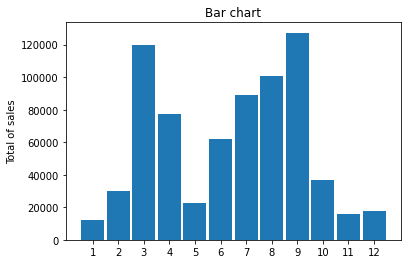

In [28]:
import matplotlib.pyplot as plt

month = range(1,13)
width = 0.9     # the width of the bars: can also be len(x) sequence

plt.subplots()

plt.bar(month, sales_results['total'], width)
plt.xticks(month)
plt.ylabel('Total of sales')
plt.title('Bar chart')

plt.show()

The months with the most sales are 3 and 9.

## Q2: What is the most sales in Country and Province?

In [29]:
pd.set_option('display.max_rows', df_new.shape[0]+1)
df_new.groupby(['billing_country', 'billing_province']).sum()

lineitem_price  lineitem_quantity  subtotal  \
billing_country billing_province                                                
AU              NSW                       449.95                 13    777.78   
                QLD                       492.64                 20    864.90   
                SA                        280.65                 11    420.45   
                TAS                         1.55                  1     39.00   
                VIC                       652.30                 21    862.26   
                WA                         86.95                  2    125.95   
CA              AB                        108.18                  5    199.28   
                BC                         58.95                  4    124.90   
                MB                         30.95                  1     30.95   
                NB                         24.14                  2     47.90   
                NL                         55.95                  2     55.95   
                ON                        534.65                 23   5780.41   
                QC                        138.80                  5    177.75   
                SK                        107.95                  3    107.95   
ES              B                           1.95                  1     39.00   
GB              ENG                        42.95                  1    112.90   
                NIR                        39.00                  1     39.00   
IE              D                          42.95                  1     42.95   
US              AE                         29.95                  1    158.80   
                AK                       2754.68                 99   4876.94   
                AL                       5512.17                220   7727.09   
                AP                         39.00                  2     78.00   
                AR                       4616.34                182   6561.64   
                AZ                       8035.93                294  10834.46   
                CA                      21504.10                740  29428.19   
                CO                       9817.20                333  14092.51   
                CT                       3944.52                131   5336.81   
                DC                        133.95                  4    172.95   
                DE                       1310.82                 49   1791.23   
                FL                      16636.22                656  23153.58   
                GA                       9283.48                370  12595.49   
                HI                        554.86                 25    990.59   
                IA                      11018.33                366  16053.32   
                ID                       3528.04                124   5771.48   
                IL                      18898.85                649  24881.75   
                IN                      18492.38                659  26712.70   
                KS                       7055.07                260  12396.49   
                KY                       7964.67                282  10663.68   
                LA                       4512.34                183   5959.59   
                MA                       8415.06                307  11554.06   
                MD                       5722.30                204   7451.77   
                ME                       3397.35                131   4685.26   
                MI                      25820.26                854  37096.99   
                MN                      12149.59                410  17865.15   
                MO                      11228.50                410  16431.37   
                MS                       2666.51                112   3474.82   
                MT                       2788.64                 97   4328.95   
                NC                      11249.63                4

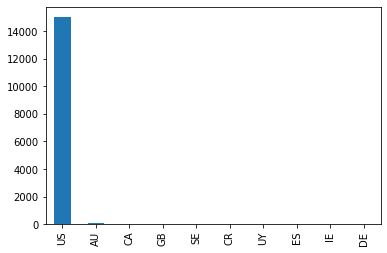

In [30]:
a = df_new['billing_country'].value_counts()
a.plot(kind='bar')

We can see that, the most sales are only in the US. So I will explore the details in this country

In [31]:
US_df = df_new[df_new['billing_country'] == 'US']
US_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15028 entries, 0 to 20204
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ord_id             15028 non-null  object        
 1   created_at         15028 non-null  datetime64[ns]
 2   lineitem_name      15028 non-null  object        
 3   vendor             13420 non-null  object        
 4   lineitem_price     15028 non-null  float64       
 5   lineitem_quantity  15028 non-null  int64         
 6   subtotal           15028 non-null  float64       
 7   shipping_cost      15028 non-null  float64       
 8   discount_amount    15028 non-null  float64       
 9   total              15028 non-null  float64       
 10  billing_name       15028 non-null  object        
 11  billing_address_1  15028 non-null  object        
 12  billing_city       15028 non-null  object        
 13  billing_zip        15028 non-null  object        
 14  billin

In [32]:
US_results = US_df.groupby('billing_province').sum()
US_results

,lineitem_price,lineitem_quantity,subtotal,shipping_cost,discount_amount,total,month_ord
billing_province,,,,,,,
AE,29.95,1,158.80,0.00,0.00,158.80,9
AK,2754.68,99,4876.94,351.45,59.81,5324.75,597
AL,5512.17,220,7727.09,876.15,33.35,8652.17,1240
AP,39.00,2,78.00,0.00,0.00,78.00,9
AR,4616.34,182,6561.64,668.10,44.61,7259.88,916
AZ,8035.93,294,10834.46,1230.25,95.24,12163.42,1813
CA,21504.10,740,29428.19,2975.18,423.66,34880.69,4551
CO,9817.20,333,14092.51,1317.45,202.30,15549.75,2097
CT,3944.52,131,5336.81,571.15,29.29,5958.53,807


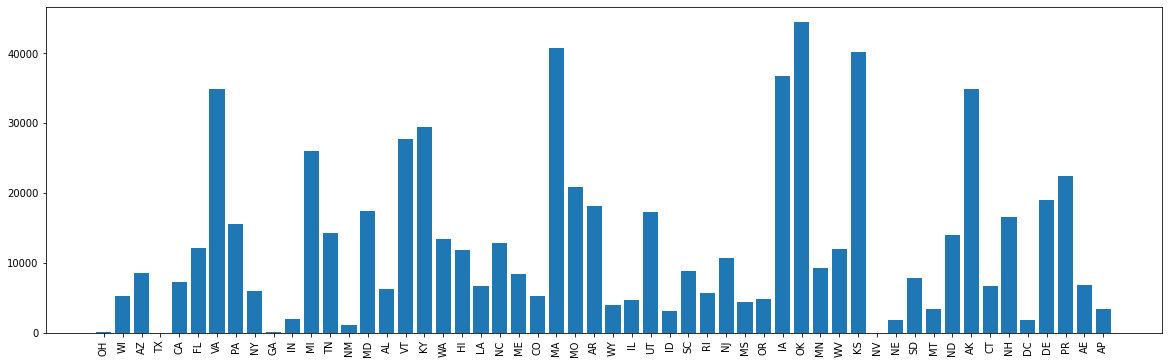

In [33]:
provinces = US_df['billing_province'].unique()
plt.figure(figsize=(20, 6))
plt.bar(provinces, US_results['total'])
plt.xticks(provinces, rotation='vertical')
plt.show()

## Q3: Which hours are the most fit for ad recommendations?

In [34]:
df_new['hour_ord'] = pd.to_datetime(df_new['created_at']).dt.hour
df_new['hour_ord'].head()

0     8
1     7
2     0
3    11
4    11
Name: hour_ord, dtype: int64

In [35]:
hourly_asc = df_new['hour_ord'].value_counts().sort_index(ascending=True)

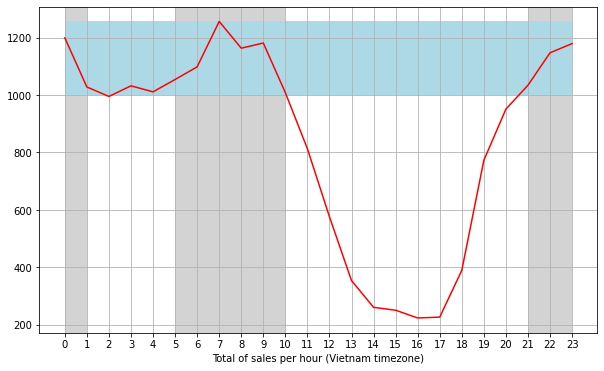

In [36]:
from matplotlib.patches import Rectangle
hours = [hour for hour, s in df_new.groupby('hour_ord')]
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax.plot(hours, hourly_asc, color = 'red')
ax.set_xlabel('Total of sales per hour (Vietnam timezone)')
ax.set_xticks(hours)
ax.grid()
ax.add_patch(Rectangle((5, 0), 5, 1500,facecolor = 'lightgray'))
ax.add_patch(Rectangle((0, 0), 1, 1500,facecolor = 'lightgray'))
ax.add_patch(Rectangle((21, 0), 2, 1500,facecolor = 'lightgray'))
ax.add_patch(Rectangle((0, 1000), 23, hourly_asc.max() - 1000,facecolor = 'lightblue'))
plt.show()

*   The timezone in this data is +0700, which means the timezone is in Asia, especially in this case Vietnam.
*   So the peak hourly sales are around (17PM-22PM) and (9AM-13PM) US timezone.
*   With these analysis I assume that the time between 17PM and 22PM, customers come home from work and have more time to use Internet.
*   I recommend that sellers should to advertise more in the time between 17PM and 22PM.






## Q4: Which categories are most often sold together?

In [37]:
df_dup = df_new[['ord_id', 'vendor', 'lineitem_name']]
df_dup = df_dup[df_dup['lineitem_name'] != 'Tip']
df_dup = df_dup[df_dup['ord_id'].duplicated(keep=False)]
df_dup.head()

,ord_id,vendor,lineitem_name
3,#25491,Support Awareness Hoodie,Suicide Prevention Awareness Hoodie Full Print...
4,#25491,Support Awareness Hoodie,Personalized Name Dates Suicide Prevention Awa...
6,#25489,Support Awareness Hoodie,Multiple Sclerosis Awareness Hoodie 3D : I’m N...
7,#25489,Support Awareness Hoodie,Multiple Sclerosis Awareness Hoodie 3D : I Wil...
11,#25485,Support-Awarenesss-Stickers,Proud Autism Dad Hoodie Full Print - Hoodie / ...


In [38]:
df_dup['vendor'] = df_dup['vendor'].astype(str)

In [39]:
df_dup['group_categ'] = df_dup.groupby('ord_id')['vendor'].transform(lambda x: ','.join(x))
df_dup['group_categ'].head()

3     Support Awareness Hoodie,Support Awareness Hoodie
4     Support Awareness Hoodie,Support Awareness Hoodie
6     Support Awareness Hoodie,Support Awareness Hoodie
7     Support Awareness Hoodie,Support Awareness Hoodie
11    Support-Awarenesss-Stickers,Support-Awarenesss...
Name: group_categ, dtype: object

In [40]:
df_dup = df_dup[['ord_id', 'group_categ']].drop_duplicates()
df_dup.head()

,ord_id,group_categ
3,#25491,"Support Awareness Hoodie,Support Awareness Hoodie"
6,#25489,"Support Awareness Hoodie,Support Awareness Hoodie"
11,#25485,"Support-Awarenesss-Stickers,Support-Awarenesss..."
21,#25478,"Support Awareness Hoodie,Support Awareness Hoodie"
35,#25467,"Support-Awarenesss-Stickers,Support-Awarenesss..."


In [41]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df_dup['group_categ']:
  row_lists = row.split(',')
  count.update(Counter(combinations(row_lists, 2)))

count.most_common(10)

[(('Support-Awarenesss-Stickers', 'Support-Awarenesss-Stickers'), 3079),
 (('Support Awareness Hoodie', 'Support Awareness Hoodie'), 1051),
 (('Support-Awarenesss-Stickers', 'Support Awareness Hoodie'), 204),
 (('Support Awareness Hoodie', 'Support-Awarenesss-Stickers'), 158),
 (('teelaunch', 'teelaunch'), 144),
 (('Decal', 'Support Awareness Hoodie'), 73),
 (('Support-Awarenesss-Stickers', 'Support Awareness'), 54),
 (('Support Awareness Hoodie', 'Support-Awarenesss'), 45),
 (('Support Awareness Hoodie', 'Decal'), 40),
 (('Support-Awarenesss', 'Support Awareness Hoodie'), 29)]

In this case, we can see that customers tend to purchase in a same category. So I **recommend** the supplier to have **up-sell** and **cross-sell** products in the same category.

## Q5: Which categories are sold the most?

In [42]:
cate_pro = df_new.groupby('vendor')
cate_pro

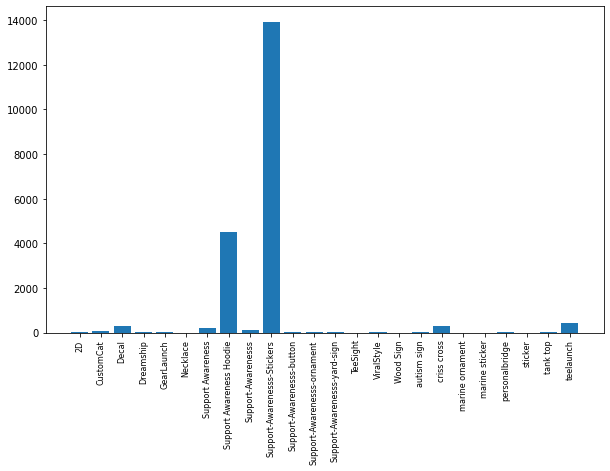

In [43]:
products = [product for product, df in cate_pro]
plt.figure(figsize = (10, 6))
plt.bar(products, cate_pro['lineitem_quantity'].sum())
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

The plot above shows that the Support-Awareness-Stickers category is the most sale.

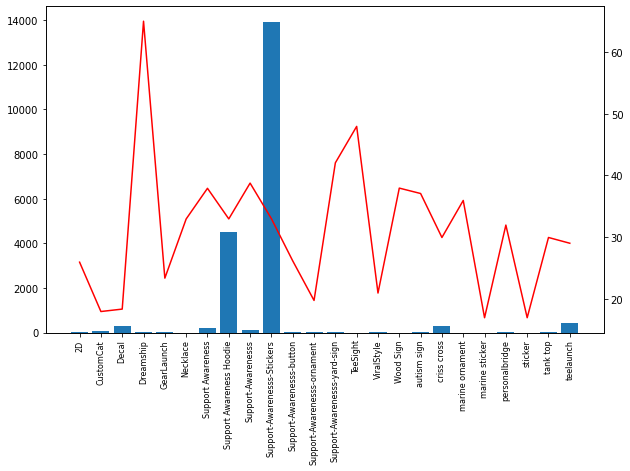

In [44]:
prices = df_new.groupby('vendor').mean()['lineitem_price']

fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
ax2 = ax1.twinx()
ax1.bar(products, cate_pro['lineitem_quantity'].sum())
ax2.plot(products, prices, color = 'red')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()

Clean data to visualize in Tableau

In [45]:
df_new.head(2)

,ord_id,created_at,lineitem_name,vendor,lineitem_price,lineitem_quantity,subtotal,shipping_cost,discount_amount,total,billing_name,billing_address_1,billing_city,billing_zip,billing_province,billing_country,ord_date,ord_time,year_ord,month_ord,day_ord,tips,hour_ord
0,#25494,2022-08-21 08:37:43,Custom In Loving Memory Sticker : In Loving Me...,Support-Awarenesss-Stickers,23.95,1,23.95,4.95,0.0,28.9,Kim Harris,1574 Lapperell Rd,Peebles,'45660,OH,US,2022-08-21,08:37:43,2022,8,21,None,8
1,#25493,2022-08-21 07:05:48,Breast Cancer Car Decal: I Suffer from breast ...,Decal,16.95,1,16.95,4.95,0.0,21.9,Koepsell crook,1259 School Drive,Waukesha,'53189,WI,US,2022-08-21,07:05:48,2022,8,21,None,7


In [46]:
df_save = df_new[['ord_id', 'created_at', 'ord_date', 'ord_time', 'year_ord',\
                  'month_ord', 'day_ord', 'hour_ord', 'vendor', 'lineitem_name',\
                  'lineitem_price',	'lineitem_quantity', 'billing_name', 'billing_address_1',\
                  'billing_city',	'billing_province', 'billing_country']]
df_save = df_save[df_save['lineitem_name'] != 'Tip']
# df_save = df_save[df_save['billing_name'] != null]
df_save = df_save[df_save['ord_id'].duplicated(keep=False)]
df_save = df_save.dropna()

In [47]:
df_save.head()

,ord_id,created_at,ord_date,ord_time,year_ord,month_ord,day_ord,hour_ord,vendor,lineitem_name,lineitem_price,lineitem_quantity,billing_name,billing_address_1,billing_city,billing_province,billing_country
3,#25491,2022-08-19 11:16:49,2022-08-19,11:16:49,2022,8,19,11,Support Awareness Hoodie,Suicide Prevention Awareness Hoodie Full Print...,39.00,1,Cheyanne Pifer,117 Brook Hollow Lane,Red Oak,TX,US
6,#25489,2022-08-19 05:35:36,2022-08-19,05:35:36,2022,8,19,5,Support Awareness Hoodie,Multiple Sclerosis Awareness Hoodie 3D : I’m N...,42.95,1,Tricia Marefke,100 South Schmidt Avenue,Marshfield,WI,US
11,#25485,2022-08-17 09:50:06,2022-08-17,09:50:06,2022,8,17,9,Support-Awarenesss-Stickers,Proud Autism Dad Hoodie Full Print - Hoodie / ...,40.95,1,Brian Booher,114 Cemetery Rd,Kittanning,PA,US
21,#25478,2022-08-13 10:14:45,2022-08-13,10:14:45,2022,8,13,10,Support Awareness Hoodie,Suicide Awareness Hoodie Full Print : Never Gi...,39.00,1,laura harper,8378 westminister dr s,mount morris,MI,US
35,#25467,2022-08-06 19:32:35,2022-08-06,19:32:35,2022,8,06,19,Support-Awarenesss-Stickers,Personalized Photo Name Dates Dog Sticker : In...,23.95,1,Alven Stroud,761 North Main Street,Slocomb,AL,US


In [48]:
df_save.isna().sum()

ord_id               0
created_at           0
ord_date             0
ord_time             0
year_ord             0
month_ord            0
day_ord              0
hour_ord             0
vendor               0
lineitem_name        0
lineitem_price       0
lineitem_quantity    0
billing_name         0
billing_address_1    0
billing_city         0
billing_province     0
billing_country      0
dtype: int64

In [49]:
df_save = df_save.loc[~df_save.ord_id.duplicated(),:].copy()
df_save.head()

,ord_id,created_at,ord_date,ord_time,year_ord,month_ord,day_ord,hour_ord,vendor,lineitem_name,lineitem_price,lineitem_quantity,billing_name,billing_address_1,billing_city,billing_province,billing_country
3,#25491,2022-08-19 11:16:49,2022-08-19,11:16:49,2022,8,19,11,Support Awareness Hoodie,Suicide Prevention Awareness Hoodie Full Print...,39.00,1,Cheyanne Pifer,117 Brook Hollow Lane,Red Oak,TX,US
6,#25489,2022-08-19 05:35:36,2022-08-19,05:35:36,2022,8,19,5,Support Awareness Hoodie,Multiple Sclerosis Awareness Hoodie 3D : I’m N...,42.95,1,Tricia Marefke,100 South Schmidt Avenue,Marshfield,WI,US
11,#25485,2022-08-17 09:50:06,2022-08-17,09:50:06,2022,8,17,9,Support-Awarenesss-Stickers,Proud Autism Dad Hoodie Full Print - Hoodie / ...,40.95,1,Brian Booher,114 Cemetery Rd,Kittanning,PA,US
21,#25478,2022-08-13 10:14:45,2022-08-13,10:14:45,2022,8,13,10,Support Awareness Hoodie,Suicide Awareness Hoodie Full Print : Never Gi...,39.00,1,laura harper,8378 westminister dr s,mount morris,MI,US
35,#25467,2022-08-06 19:32:35,2022-08-06,19:32:35,2022,8,06,19,Support-Awarenesss-Stickers,Personalized Photo Name Dates Dog Sticker : In...,23.95,1,Alven Stroud,761 North Main Street,Slocomb,AL,US


In [50]:
df_save.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 3 to 20201
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ord_id             2151 non-null   object        
 1   created_at         2151 non-null   datetime64[ns]
 2   ord_date           2151 non-null   object        
 3   ord_time           2151 non-null   object        
 4   year_ord           2151 non-null   object        
 5   month_ord          2151 non-null   int64         
 6   day_ord            2151 non-null   object        
 7   hour_ord           2151 non-null   int64         
 8   vendor             2151 non-null   object        
 9   lineitem_name      2151 non-null   object        
 10  lineitem_price     2151 non-null   float64       
 11  lineitem_quantity  2151 non-null   int64         
 12  billing_name       2151 non-null   object        
 13  billing_address_1  2151 non-null   object        
 14  billing

In [51]:
df_save.to_csv('data_save.csv', index=False)